In [10]:
#Setup and Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite") 

In [3]:
# Declares a Base using 'automap_base()'
Base = automap_base()
# Reflects the tables
Base.prepare(engine, reflect=True)

In [4]:
# Prints all the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
# Saves references to each table by assigning them to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Creates a session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# My goal is to design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date of the last data point in the database
results = session.query(Measurement.date)
last_date = results[-1]
last_date

# The date 1 year ago from the last date below is '2016-08-23'
# I shall retrieve the last 12 months of precipation using both dates

('2017-08-23')

In [16]:
# Performs a query to retrieve the data and precipitation scores
precip_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23')

In [21]:
# Saves the query results as a Pandas DataFrame and sets the index to the date column
precip_df = pd.DataFrame(precip_query, columns=['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True)
precip_df = precip_df.dropna()
precip_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


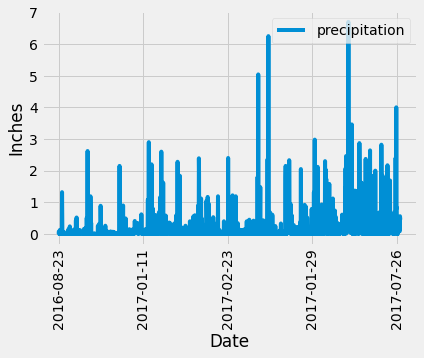

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(['precipitation'], loc= 'upper right')
plt.xticks(rotation=90)
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [33]:
# Queries how many stations are available in this dataset
session.query(func.count(Station.station)).all()

[(9)]

In [36]:
# Lists the most active stations and the counts in descending order.
station_count = func.count(Measurement.station)
session.query(Measurement.station, station_count).\
group_by(Measurement.station).\
order_by(station_count.desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station,\
              func.min(Measurement.tobs),\
              func.max(Measurement.tobs),\
              func.avg(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

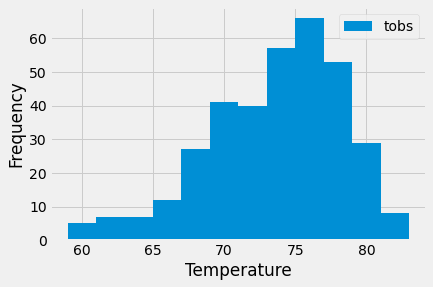

In [43]:
# Taking the most active station, this will query the last 12 months of temperature observation data 
# for this station and plot the results as a histogram

most_active_station_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == 'USC00519281').all()

# Plots the most active station temps (MAST) as a histogram
mast_df = pd.DataFrame(most_active_station_temps)
mast_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'], loc= 'upper right')